# Group 79

* Mohamed Thaha Jiffry Ahamed Hibishy (S3851674)
* Rooban Kumar Gopi (S3806269)
* Biswabal Gurung (S3820568)

# Predicting Term Deposit Subscriptions in Bank

## Table of Contents
- [Introduction](#intro)
  + [Report Overview](#ro)
  + [Overview of Methodology](#oom)
- [Data Preperation](#dp)
  + [Loading Dataset](#ld)
  + [Splitting Data and target](#sd)
  + [Encoding the Categorical Features](#en)
  + [Scaling of Features](#sc)
- [Predictive Modelling](#pm)
  + [Feature Selection](#fs)
  + [Model Fitting & Tuning](#mft)
  + [Model Comparision](#mc)
- [Critique & Limitations](#cl)
- [Summary & Conclusions](#sc)
  + [Project Summary](#ps)
  + [Summary of Findings](#sof)
  + [Conclusions](#c)
- [References](#ref)

## INTRODUCTION <a id='intro'></a>


### Report Overview <a id='ro'></a>

In this report, we are trying to predict whether a bank customer will subscribe for the term deposit or not during the bank marketing campaigns.

This report includes overview of our methodology, summary of our data preparation, predictive modelling, model comparisons and a brief summary of our findings and limitations of our project.

### Overview of Methodology <a id='oom'></a>

The dataset was cleaned in the Phase 1. For Phase 2, we used the cleaned dataset and did further transformation such as encoding of categorical variables and scaling of the numeric variables. After transformation the number of descriptive features increased from 15 to 47. Our dataset had 11,162 observations so we considered all the observations for the modelling. The descriptive features and the target features were then split from the dataset. The datasets were then split into training dataset and test dataset with 70:30 ratio. The training dataset was used during building and hyper-parameter tuning of the model. The test dataset was used during the model comparison.

Before building the models using F-score best 10 features were selected and visualized to comply with the assignment rubrics. However, full set of features were used during model building and hyper-parameter tuning because of the increased accuracy. We can also pipeline feature selection and grid search for hyper-parameter tuning but for this assignment we considered full set of features.

We built 5 classifiers K-nearest neighbors (KNN), Decision Tree (DT), Naive Bayes (NB), Random Forest (RF) classifier and Support Vector Classification (SVC) models. The models were then performed hyper-parameter tuning on training dataset using 5-fold cross-validation. The tuned models were then compared based on AUC score in test dataset with 5-fold cross-validation and then performed paired t-tests to select the best model statistically.


## DATA PREPARATION <a id='dp'></a>

### Loading Dataset <a id='ld'></a>

Importing some of the required modules, setting up the relevant random state and loading the cleaned dataset from Phase 1.

In [1]:
# Suppressing python warnings
import warnings
warnings.filterwarnings("ignore")

# importing the required modules
import pandas as pd
import numpy as np

# making sure while displaying dataframes it display all the columns
pd.set_option('display.max_columns', None) 

# Set a seed value
seed_value = 999 
# 1. Initialise `PYTHONHASHSEED` environment variable
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Initialise Python's own pseudo-random generator
import random
random.seed(seed_value)
# 3. Initialise Numpy's pseudo-random generator
np.random.seed(seed_value)

# loading dataset
bank = pd.read_csv('Data_Group79_Cleaned.csv')

In [2]:
# diplaying first 5 observations
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


In [3]:
# cheking data types
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

### Splitting Data and target <a id='sd'></a>

Splitting data into Data and target.

In [4]:
# storing descriptive features to Data
Data = bank.drop(columns='deposit')

# storing target feature to target
target = bank['deposit']

### Encoding the Categorical Features <a id='en'></a>

All the categorical features irrespective of descriptive or target needs to be converted to numeric. For this we perform one-hot encoding.

#### Encoding the target Feature <a id='ld'></a>

For the target Feature the positive class is yes, so encoding 'yes' as 1 and 'no' as 0.

In [5]:
# looking at counts of target variables
target.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [6]:
# encoding 'yes' as 1 and 'no' as 0
target = target.replace({'no': 0, 'yes': 1})

target.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

#### Encoding Categorical Descriptive Features<a id='ecf'></a>

Below, we make a list of columns with the data type 'objects'. Then we run a for loop to check if the feature has only two levels which we will make them binary. For the others we use regular one hot encoding.

In [7]:
# get the list of categorical descriptive features
categorical_cols = Data.columns[Data.dtypes==object].tolist()

# if a categorical descriptive feature has only 2 levels,
# define only one binary variable
for col in categorical_cols:
    n = len(Data[col].unique())
    if (n == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)

# for other categorical features (with > 2 levels), 
# use regular one-hot-encoding 
Data = pd.get_dummies(Data)

In [8]:
# displaying the first 5 observations after one-hot-encoding 
Data.head(5)

,age,default,balance,housing,loan,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,56,0,45,0,0,5,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,41,0,1270,1,0,5,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,55,0,2476,1,0,5,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,54,0,184,0,0,5,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


### Scaling of Features<a id='sc'></a>

Scaling 'age' and 'balance' numeric variables before modeling.

In [9]:
# Scaling the numeric descriptive feature
from sklearn import preprocessing

Data['age'] = preprocessing.MinMaxScaler().fit_transform(Data['age'].values.reshape(-1,1))
Data['balance'] = preprocessing.MinMaxScaler().fit_transform(Data['balance'].values.reshape(-1,1))

# display first 5 observations
Data.head(5).round(3)

,age,default,balance,housing,loan,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.532,0,0.104,1,0,5,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.494,0,0.078,0,0,5,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0.299,0,0.092,1,0,5,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0.481,0,0.106,1,0,5,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0.468,0,0.080,0,0,5,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


## PREDICTIVE MODELLING <a id='pm'></a>

### Feature Selection <a id='fs'></a>

In this section, we are trying to look at the best 10 features based on F-Score and visualize them. However, for the model building and hyper-parameter tuning we will use the full set of features because of the increased accuracy.

In [10]:
# Display all features
Data.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [11]:
# selects best 10 features (code from Feature Ranking website)
from sklearn import feature_selection as fs

num_features = 10

fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]

# display selected features
fs_indices_fscore

array([45, 30, 46, 28,  3, 39,  7,  8, 38, 41], dtype=int64)

In [12]:
# map the above selected feature number with the actual feature names
best_features_fscore = Data.columns[fs_indices_fscore].values

# display selected features name
best_features_fscore

array(['poutcome_success', 'contact_unknown', 'poutcome_unknown',
       'contact_cellular', 'housing', 'month_may', 'pdays', 'previous',
       'month_mar', 'month_oct'], dtype=object)

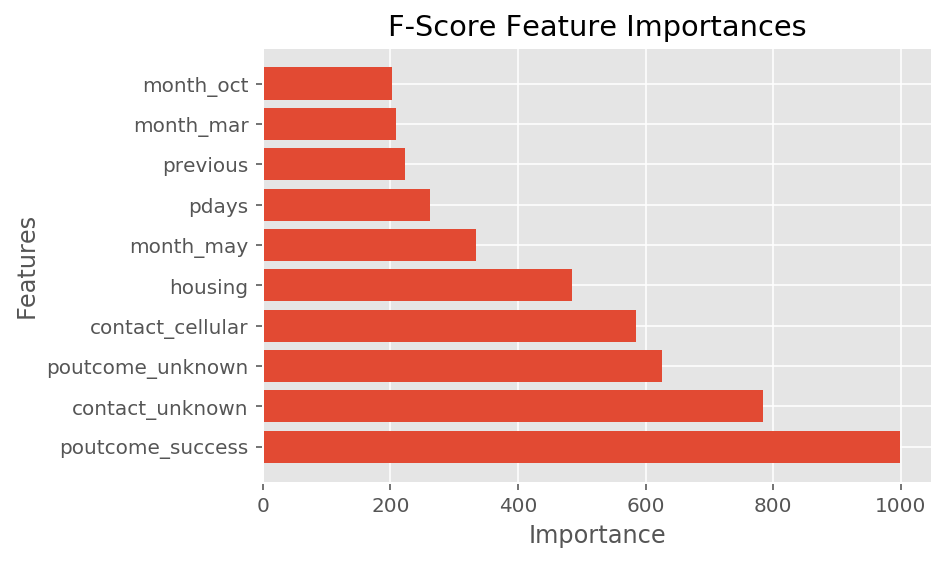

In [13]:
# store selected features score
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]

# plot the feature score in a graph to see the selected feature importance (code from Feature Ranking website)
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
    

plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

Based on F-Score feature selection technique 'poutcome_success' is the most important feature and 'month_oct' is the least important feature out of the selected 10 features.

### Model Fitting & Tuning <a id='mft'></a>

#### Train-Test Splitting

Splitting the dataset into train and test with 70:30 ratio before fitting and tuning the model. The 70% of the dataset is used to train and tune the model, the remaining 30% is used during the comparison of the 5 models which we are going to implement below.

In [14]:
# Saving Data to X and target to y (following naming convention)
# Storing it to numpy array
X = Data.values
y = target.values

In [15]:
from sklearn.model_selection import train_test_split

# splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=seed_value)

In [16]:
# checking train and test size
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7813, 47)
(3349, 47)
(7813,)
(3349,)


#### K-Nearest Neighbors

For tuning each of the model below including KNN we are going to use 5-fold stratified cross-validation. As we are using all the features for fitting & tuning the model we haven't implemented pipeline in our approach. For measuring prediction accuracy of all the below models we considered AUC score.

We implemented grid search for KNN hyper-parameter tuning along with 5-fold stratified cross-validation. We considered following hyper-parameters for KNN:
* n_neighbours
* p

In [17]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# defining our 5-fold cross-validation technique
cv_method = StratifiedKFold(n_splits=5, random_state=seed_value)

In [18]:
from sklearn.neighbors import KNeighborsClassifier


params_KNN = {'n_neighbors': [1, 5, 10, 15, 20, 25, 30],
                   'p': [1, 2]}

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                           param_grid=params_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1)

In [19]:
# fitting the model with train dataset
gs_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-2)]: Done  70 out of  70 | elapsed:   16.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-2,
             param_grid={'n_neighbors': [1, 5, 10, 15, 20, 25, 30],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [20]:
# display the best parameters
gs_KNN.best_params_

{'n_neighbors': 25, 'p': 1}

In [21]:
# display the AUC score of the KNN model
gs_KNN.best_score_

0.7526711361429341

The KNN model with n_neighbors = 25 and p = 1 (Manhattan Distance) is the model which gives the AUC score of 0.753.

Now using the code from the Feature Ranking website we will try to visualize the performance of KNN model with various different combination of KNN hyper-parameters.

In [22]:
# custom function to format the search results as a Pandas data frame (code from Feature Ranking website)
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [23]:
# Convert grid search results to dataframe using above function
results_KNN = get_search_results(gs_KNN)

# display the dataframe
results_KNN.head()

,mean_score,std_score,max_score,min_score,n_neighbors,p
10,0.752670,0.008228,0.763644,0.742223,25.0,1.0
12,0.752429,0.007755,0.761862,0.743117,30.0,1.0
8,0.751235,0.007175,0.759547,0.740551,20.0,1.0
6,0.747135,0.006664,0.756757,0.737468,15.0,1.0
13,0.740962,0.005551,0.751352,0.735329,30.0,2.0


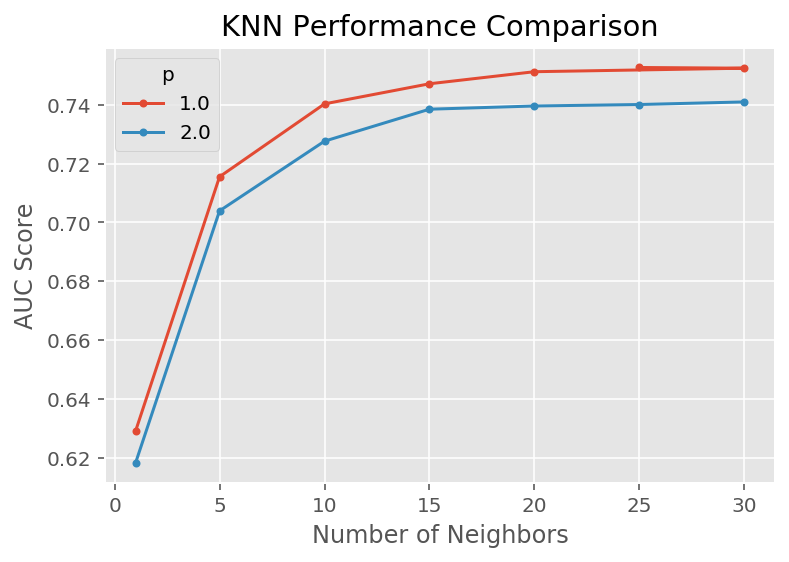

In [24]:
# plot a graph to display KNN model AUC score based on various combination of hyper-parameters 
# (code modified from feature ranking website)

for i in results_KNN['p'].unique():
    temp = results_KNN[results_KNN['p'] == i]
    plt.plot(temp['n_neighbors'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "p")
plt.xlabel('Number of Neighbors')
plt.ylabel("AUC Score")
plt.title("KNN Performance Comparison")
plt.show()

There seems to be an increase in AUC score of KNN model on increasing the k-neighbors using Manhattan distance than using Euclidean distance.

#### Decision Tree

In order to build decision tree we considered gini, we implemented grid search for decision tree hyper-parameter tuning along with 5-fold stratified cross-validation. We considered following hyper-parameters:
* max_depth
* min_samples_split

In [25]:
from sklearn.tree import DecisionTreeClassifier


params_DT = {'max_depth': [3, 4, 5],
                  'min_samples_split': [2, 5]}

gs_DT = GridSearchCV(estimator=DecisionTreeClassifier(criterion='gini', random_state=seed_value), 
                          param_grid=params_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_DT.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  30 out of  30 | elapsed:    0.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=False),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=999,
                                              splitter='best'),
             iid='warn', n_jobs=-2,
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split

In [26]:
# display the best parameters
gs_DT.best_params_

{'max_depth': 5, 'min_samples_split': 5}

In [27]:
# display the AUC score of the Decision tree model
gs_DT.best_score_

0.7202096974886911

The Decision tree model with max_depth = 5 and min_samples_split = 5 is the best DT model with AUC score of 0.720.

Visualizing the grid search results of Decision tree model.

In [28]:
# Convert grid search results to dataframe using above function
results_DT = get_search_results(gs_DT)

# display the dataframe
results_DT.head()

,mean_score,std_score,max_score,min_score,max_depth,min_samples_split
5,0.720205,0.015545,0.745205,0.698887,5.0,5.0
4,0.719737,0.015222,0.743990,0.698887,5.0,2.0
2,0.710452,0.011274,0.728010,0.695276,4.0,2.0
3,0.710363,0.011136,0.727565,0.695276,4.0,5.0
0,0.698449,0.018512,0.734054,0.681929,3.0,2.0


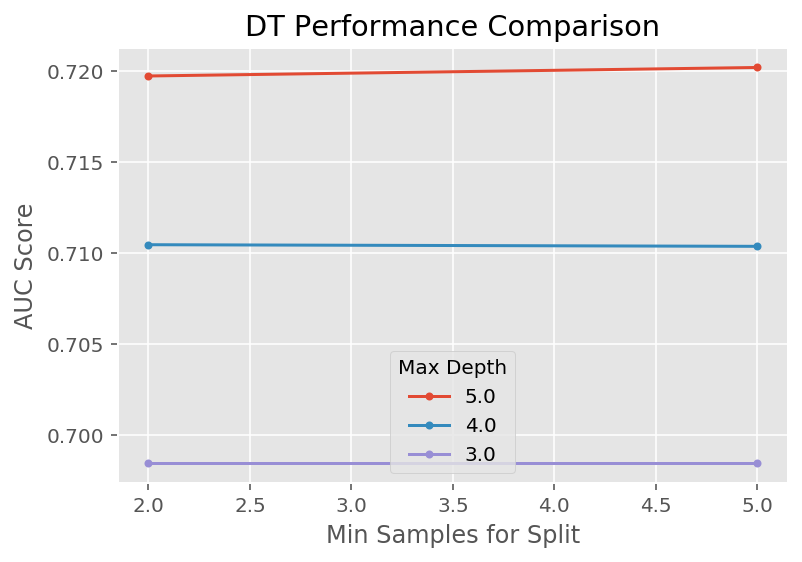

In [29]:
# visualizing the grid search of DT

for i in results_DT['max_depth'].unique():
    temp = results_DT[results_DT['max_depth'] == i]
    plt.plot(temp['min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("AUC Score")
plt.title("DT Performance Comparison")
plt.show()

We see that the AUC score increases on increasing the max_depth, however the AUC score doesn't change much on increasing the min_samples_split.

#### Naive Bayes

For tuning Naive Bayes model we are using only var_smoothing as hyper-parameter, in order to do that we are using Randomized Search instead of grid search because this helps us by choosing random combinations hyper-parameter values unlike grid search and it saves the running time for the purpose of this assignment. Before fitting the NB model the descriptive features are converted to Gaussian distribution.

In [30]:
from sklearn.preprocessing import PowerTransformer

# Converting descriptive features to GAussian distribution
X_train_transformed = PowerTransformer().fit_transform(X_train)

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

params_NB = {'var_smoothing': np.logspace(1,-9, num=100)}

n_iter_search = 20
gs_NB = RandomizedSearchCV(estimator=GaussianNB(), 
                          param_distributions=params_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

In [31]:
# fitting the NB model
gs_NB.fit(X_train_transformed, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    1.1s finished


In [32]:
# displaying the best parameters for NB
gs_NB.best_params_

{'var_smoothing': 6.280291441834253}

In [33]:
# displaying the AUC score of the NB model
gs_NB.best_score_

0.7389447370017501

The optimal Naive Bayes model achieves an AUC score of 0.739.

Now, visualizing the search results of NB model.

In [34]:
# converting search results to dataframe and display dataframe
results_NB = get_search_results(gs_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,var_smoothing
16,0.738944,0.016005,0.769200,0.726272,6.280291
0,0.738324,0.015968,0.768452,0.724093,10.000000
10,0.736037,0.017456,0.768747,0.717565,0.977010
9,0.733570,0.018435,0.768158,0.713596,0.151991
4,0.733470,0.018467,0.768136,0.713504,0.120450


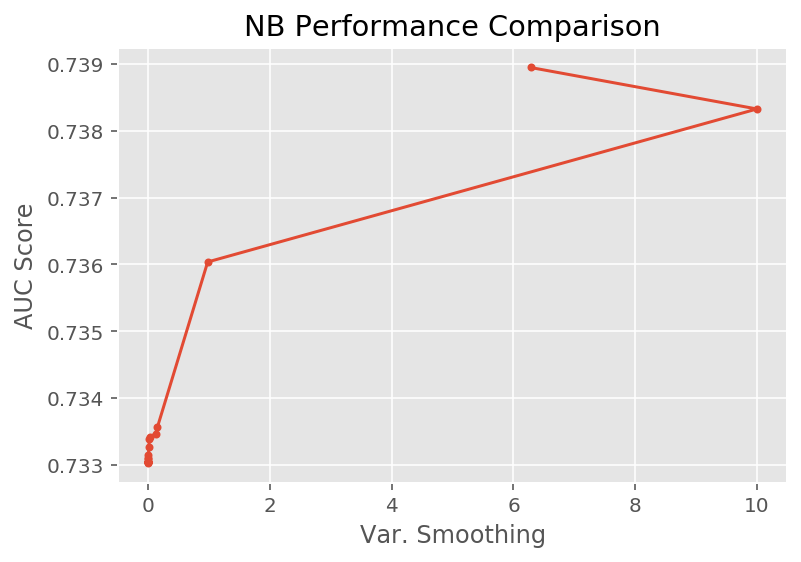

In [35]:
# visualizing the hyper-parameter tuning of NB

plt.plot(results_NB['var_smoothing'], results_NB['mean_score'], marker = '.', label = i)    
plt.xlabel('Var. Smoothing')
plt.ylabel("AUC Score")
plt.title("NB Performance Comparison")
plt.show()

From this graph we could see that the AUC score of NB increases slightly on increasing the var_smoothing.

#### Random Forest Classifier

In order to fit and tune Random forest classifier we considered max_features = 'sqrt' and bootstrap = True, we implemented Randomized search for hyper-parameter tuning along with 5-fold stratified cross-validation for the purpose of this assignment to save the run time. We considered following hyper-parameters:
* max_depth
* min_samples_split
* min_samples_leaf

In [36]:
from sklearn.ensemble import RandomForestClassifier

params_RF = {'max_depth': [3, 4, 5, 10],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

gs_RF = RandomizedSearchCV(estimator=RandomForestClassifier(max_features = 'sqrt', criterion='gini', bootstrap = True, random_state = seed_value), 
                          param_distributions=params_RF, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-1,
                          scoring='roc_auc',
                          n_iter=20,
                          verbose=1) 

# fitting the model
gs_RF.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished


In [37]:
# display the best hyperparameters for Random forest classifier
gs_RF.best_params_

{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}

In [38]:
# display the AUC score for the optimal Random forest classifer
gs_RF.best_score_

0.7732882080919651

On performing hyper-parameter tuning to the Random forest classifier we achieved the best AUC score of 0.773 which is better than the above KNN, DT and NB models. However, for further model comparison we may need to compare their performances in the test dataset using other evaluation techniques such as paired t-tests. This is done in the model evaluation section of this report.

Now, visualizing the search results of Random forest classifier.

In [39]:
# converting the search results into dataframe
results_RF = get_search_results(gs_RF)

# display the dataframe
results_RF.head()

,mean_score,std_score,max_score,min_score,min_samples_split,min_samples_leaf,max_depth
6,0.773286,0.010388,0.793726,0.765549,10.0,2.0,10.0
8,0.772115,0.009355,0.790339,0.765144,5.0,4.0,10.0
12,0.772115,0.009355,0.790339,0.765144,2.0,4.0,10.0
3,0.770070,0.013865,0.796159,0.757037,5.0,1.0,10.0
10,0.770055,0.012138,0.792369,0.757480,2.0,1.0,10.0


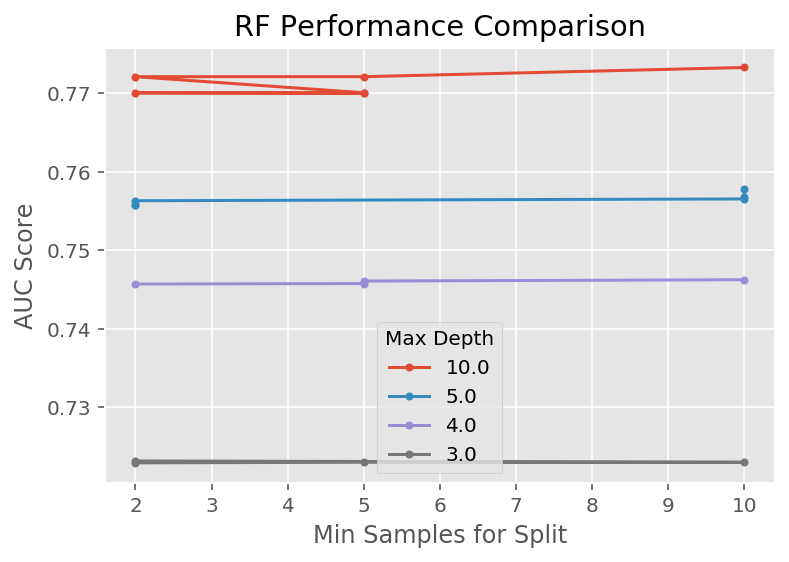

In [40]:
for i in results_RF['max_depth'].unique():
    temp = results_RF[results_RF['max_depth'] == i]
    plt.plot(temp['min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("AUC Score")
plt.title("RF Performance Comparison")
plt.show()

The AUC score of RF with max_depth = 10 is higher that with max_depth = 3. However, there is no change in score on increasing only the min_sample_split.

#### Support Vector Classification

For support vector classification tuning we considered the below hyper-parameters using grid search
* C
* degree

In [41]:
from sklearn import svm


params_SVC = {'C': [1.0, 1.5, 2.0] ,
             'degree': [1, 2, 3]}

gs_SVC = GridSearchCV(estimator=svm.SVC(), 
                           param_grid=params_SVC, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='roc_auc',
                           verbose=1)

In [42]:
# fitting SVC model
gs_SVC.fit(X_train, y_train);

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  45 out of  45 | elapsed:  2.1min finished


In [43]:
# display the best parameters of optimal SVC model
gs_SVC.best_params_

{'C': 2.0, 'degree': 1}

In [44]:
# display the AUC score of optimal SVC model
gs_SVC.best_score_

0.7622966578534639

The AUC score of the optimal SVC model is 0.762.

Visualizing the grid search output below.

In [45]:
# format grid search output into dataframe and then display 
results_SVC = get_search_results(gs_SVC)
results_SVC.head()

,mean_score,std_score,max_score,min_score,C,degree
6,0.762295,0.009735,0.778045,0.747745,2.0,1.0
7,0.762295,0.009735,0.778045,0.747745,2.0,2.0
8,0.762295,0.009735,0.778045,0.747745,2.0,3.0
3,0.761828,0.010259,0.779145,0.747660,1.5,1.0
4,0.761828,0.010259,0.779145,0.747660,1.5,2.0


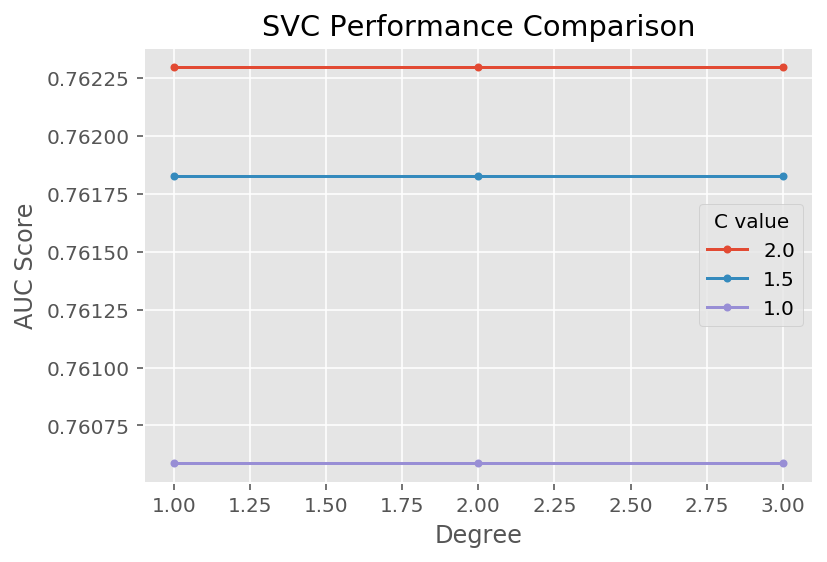

In [46]:
# visualizing the combination of C and degree during hypertuning of SVC model
for i in results_SVC['C'].unique():
    temp = results_SVC[results_SVC['C'] == i]
    plt.plot(temp['degree'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "C value")
plt.xlabel('Degree')
plt.ylabel("AUC Score")
plt.title("SVC Performance Comparison")
plt.show()

The above graph indicates that their is no change in AUC score on increasing the degree. However, the accuracy increases slightly on increasing the value of C. So, the AUC score of SVC is high for C value 2 than 1.

### Model Comparison <a id='mc'></a>

The above KNN, DT, NB, RFC and SVC models were trained and tuned with the training dataset using 5-fold stratified cross-validation method.Now, we would like to compare the performances of those tuned models using paired t-test. In order to do that  we will perform 5-fold cross-validation to those 5 tuned models with our test dataset, then we will perform paired t-tests among the combination of models to determine if the performance of one model is better than the other and prove it statistically significant. During the process used AUC score to compare the model and also we are supposed to use the same seed for cross-validation for all the 5 models.

In [47]:
from sklearn.model_selection import cross_val_score

# defining cross-validation method
cv_method_ttest = StratifiedKFold(n_splits=5, random_state=seed_value)

In [48]:
cv_results_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,
                                 X=X_test,
                                 y=y_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.7489279524037676

The cross validation score for the tuned KNN model on our test set is 0.749 while using our train set was 0.753.

In [49]:
cv_results_DT = cross_val_score(estimator=gs_DT.best_estimator_,
                                X=X_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

0.7090517313036963

The cross validation score for the tuned DT model on our test set is 0.709 while using our train set was 0.720.

In [50]:
cv_results_NB = cross_val_score(estimator=gs_NB.best_estimator_,
                                X=X_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()


0.6164754157818573

The cross validation score for the tuned NB model on our test set is 0.616 while using our train set was 0.739. Our tune Naive bayes model is found to be over-fitting, so we simply ignore NB model for the model comparison for the purpose of our assignment. However, this might need to retrain and tune the model using over-fitting preventing techniques which has not been covered in this report.

In [51]:
cv_results_RF = cross_val_score(estimator=gs_RF.best_estimator_,
                                X=X_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_RF.mean()

0.7728593613857612

The cross validation score for the tuned Random forest classifier on our test set is 0.773 while using our train set was 0.773.

In [52]:
cv_results_SVC = cross_val_score(estimator=gs_SVC.best_estimator_,
                                X=X_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_SVC.mean()

0.7582933405817631

The cross validation score for the tuned SVC on our test set is 0.758 while using our train set was 0.762.

Now, we will compare the performances of KNN, DT, RF and SVC (note: we ignored NB because of over-fitting) using paired t-tests with stats.ttest_rel function from the SciPy module.

In [53]:
from scipy import stats

# paired t-test between KNN and DT
print(stats.ttest_rel(cv_results_KNN, cv_results_DT))

Ttest_relResult(statistic=4.597509114851691, pvalue=0.010049741937848836)


Cross-validation score on test set for KNN was 0.749 and for DT it was 0.709 and the paired t-test between these 2 model indicates p-value < 0.05. So we can say that KNN is statistically better than the DT.

The cross-validation score of Random forest is 0.773 on test set which is better than that of KNN. So let's check whether the difference is statistically significant.

In [54]:
print(stats.ttest_rel(cv_results_KNN, cv_results_RF))

Ttest_relResult(statistic=-3.8273027348307234, pvalue=0.018661146491933196)


As the p-value is really really less than 0.05 so it shows the performance of Random forest is far better than KNN.

In [55]:
print(stats.ttest_rel(cv_results_RF, cv_results_SVC))

Ttest_relResult(statistic=1.4556949592854929, pvalue=0.21918219680151954)


The cross validation score of SVC is 0.758 which is little less than than that of Random forest and the paired t-test indictes p-value greater than 0.05 so we can say that the AUC score of Random forest is not significantly better than SVC.

From all the above results, we can conclude that Random forest and SVC perform equally well and they are statistically better than the other models.

For the purpose of this assignment we were supposed to compare the models using paired-t test, but there are other ways to evaluate models based on classification report (metrics such as Accuracy, Precision, Recall, F-1 Score), confusion matrix, ROC curves etc. 

Below is the classification report for all the above 5 models:

In [56]:
# predicting using the test data
pred_KNN = gs_KNN.predict(X_test)
pred_DT = gs_DT.predict(X_test)
pred_NB = gs_NB.predict(X_test)
pred_RF = gs_RF.predict(X_test)
pred_SVC = gs_SVC.predict(X_test)

In [57]:
from sklearn import metrics

# display classification report for all the 5 models
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(y_test, pred_KNN))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(y_test, pred_DT))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(y_test, pred_NB))
print("\nClassification report for Random Forest") 
print(metrics.classification_report(y_test, pred_RF))
print("\nClassification report for SVC") 
print(metrics.classification_report(y_test, pred_SVC))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1772
           1       0.74      0.59      0.66      1577

    accuracy                           0.71      3349
   macro avg       0.72      0.70      0.70      3349
weighted avg       0.72      0.71      0.71      3349


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.66      0.83      0.73      1772
           1       0.73      0.52      0.61      1577

    accuracy                           0.68      3349
   macro avg       0.69      0.67      0.67      3349
weighted avg       0.69      0.68      0.67      3349


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.59      0.84      0.69      1772
           1       0.66      0.36      0.46      1577

    accuracy                           0.61      3349
  

Looking at the precision and recall for both positive and negative classes of all the models we can say Random Forest classifier and Support Vector classifier performed equally well which supports our earlier model evaluation using paired t-tests.

## CRITIQUE & LIMITATIONS <a id='cl'></a>

The important thing to note is there is no over-fitting with the Random Forest Classifier built which is also one of the model that performed better than the other models. Therefore, we can further improve the performance of Random Forest classifier with other hyper-parameter searching and tuning the model.

We used whole set of features during predictive modelling, but in large dataset with lots of features this may not be an appropriate solution. Too many features is sometime bad it results in over-fitting. Our approach needs deeper analysis of feature selection and hyper-parameter tuning. The AUC score of Naive Byes decreases on the test dataset this might also need further investigation which is not discussed in this report. The other limitation is we are using the old dataset, the owner of the dataset has come with additional features to improve the performance of the classifier.

## SUMMARY & CONCLUSIONS <a id='sc'></a>

### Project Summary <a id='ps'></a>

The main goal of the whole project was to explore and build a predictive model to predict the customers who are more likely to subscribe for the term deposit in the bank. In Phase 1 we focused more on the data preparation and exploration.All the cleansing of the data were done in this phase. The insights from data explorations were mentioned in Phase 1 report. 

In phase two, we used the already cleansed dataset to build predictive models. Further data transformations to suit the functionalities of models, such as scaling and encoding were done which was followed by the model building. We built 5 models 
KNN, DT, NB, RFC and SVC. Necessary hyperparameter tuning for the models were done as well and all these models were evaluated using comparison paired t-tests.

### Summary of Findings <a id='sof'></a>

The cross-validation AUC score of Random Forest classifier on both train and test data is found to be the best among other models. However, on performing paired t-tests there was not statistically significant differences between Random Forest classifier and Support Vector Classification this is also supported by comparing the precision and recall metrics from the classification report of all the models. We also found that there is no over-fitting in the Random Forest classifier but for some reason there is a huge over-fitting in the Naive Bayes classifier.

### Conclusions <a id='c'></a>

At present, businesses have started looking towards automation and AI to improve their business processes. Specially banks who has been more keen on AI and Data Science. As our goal of the project was to predict whether the customer will subscribe for the term deposit or not during the bank marketing campaigns we can conclude that using the built Random Forest Classifier can help achieve the goal. However, the model is to predict the outcome of the marketing campaigns done on a phone call. For further improvements on the marketing strategies, the banks would have to do necessary data explorations.

## REFERENCES <a id='ref'></a>

Aksakalli, V., Yenice, Z., Wong, Y., Ture, I., & Malekipirbazari, M. (2021). Feature Selection and Ranking in Machine Learning | www.featureranking.com. www.featureranking.com. Retrieved 28 May 2021, from https://www.featureranking.com/.

Janio Martinez, B. (2021). Bank Marketing Dataset. Kaggle.com. Retrieved 5 April 2021, from https://www.kaggle.com/janiobachmann/bank-marketing-dataset.

S. Moro, P. Cortez, & P.Rita (2021). UCI Machine Learning Repository: Bank Marketing Data Set. Archive.ics.uci.edu. Retrieved 5 April 2021, from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing.

S. Moro, P. Cortez & P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014.

scikit-learn: machine learning in Python — scikit-learn 0.16.1 documentation. Scikit-learn.org. (2021). Retrieved 31 May 2021, from https://scikit-learn.org.